In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Simple Linear Regression

In [165]:
def make_2d_plot(scatters=[], lines=[]):
    L = len(scatters)
    if L > 0:
        colors = cm.rainbow(np.linspace(0, 1, L/2))
        for idx in range(0,L,2):
            X = scatters[idx]
            X = np.array([x[0] for x in X])

            y = scatters[idx+1]
            y = np.array([x[0] for x in y])

            plt.scatter(X, y, color=colors[int(idx/2)])
    
    L = len(lines)
    if L > 0:
        colors = cm.rainbow(np.linspace(0, 1, L/2))
        for idx in range(0,L,2):
            X = lines[idx]
            X = np.array([x[0] for x in X])

            y = lines[idx+1]
            y = np.array([x[0] for x in y])

            s = np.argsort(X)
            X = X[s]
            y = y[s]

            plt.plot(X, y, color=colors[int(idx/2)])
    plt.show()

In [166]:
X = [[6],[8],[10],[14],[18]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

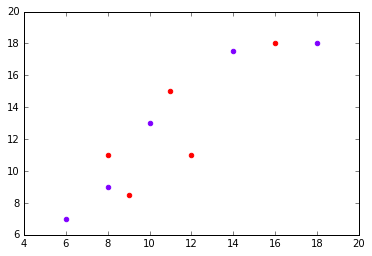

In [167]:
make_2d_plot([X, y, X_test, y_test], [])

In [168]:
model = LinearRegression()
model.fit(X, y)
model.score(X_test, y_test)

0.6620052929422553

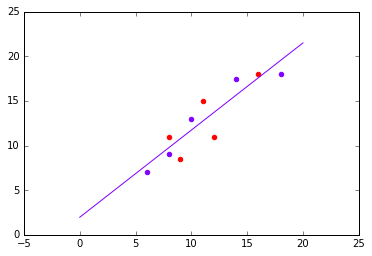

In [169]:
xx = np.linspace(0, 20, 10).reshape(10, 1)
yy = model.predict(xx)
make_2d_plot([X, y, X_test, y_test], [xx, yy])

# Multivariate Linear Regression

In [170]:
def make_3d_plot(scatters, lines):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    L = len(scatters)
    if L > 0:
        colors = cm.rainbow(np.linspace(0, 1, L/2))
        for idx in range(0,L,2):
            X = scatters[idx]
            x = np.array([x[0] for x in X])
            y = np.array([x[1] for x in X])

            z = scatters[idx+1]
            z = np.array([x[0] for x in z])

            ax.scatter(x, y, z, color=colors[int(idx/2)])
            
    L = len(lines)
    if L > 0:
        colors = cm.rainbow(np.linspace(0, 1, L/2))
        for idx in range(0,L,2):
            X = lines[idx]
            x = np.array([x[0] for x in X])
            y = np.array([x[1] for x in X])

            z = lines[idx+1]
            z = np.array([x[0] for x in z])

            ax.plot(x, y, z, color=colors[int(idx/2)])

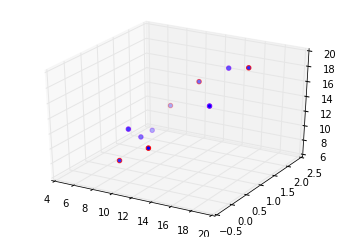

In [171]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[8, 2], [9, 0], [11, 2], [12, 0], [16, 2]]
y_test = [[11], [8.5], [15], [11], [18]]
make_3d_plot([X, y, X_test, y_test], [])

In [172]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
model.score(X_test, y_test)

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 13.3125], Target: [11]
Predicted: [ 18.14583333], Target: [18]


0.77016777313184681

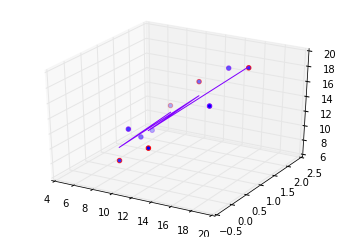

In [173]:
make_3d_plot([X, y, X_test, y_test], [X_test, predictions])

# Polynomial Regression

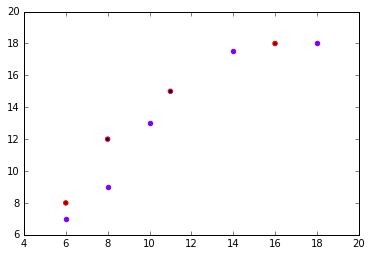

In [184]:
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
make_2d_plot([X_train, y_train, X_test, y_test], [])

In [185]:
# fit a 2nd order polynomial
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quad = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.fit_transform(X_test)

In [186]:
model = LinearRegression()
model.fit(X_train_quad, y_train)
model.score(X_test_quadratic, y_test)

0.86754436563450543

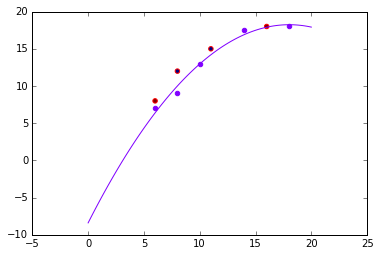

In [187]:
xx = np.linspace(0, 20, 100).reshape(100, 1)
xx_quad = quadratic_featurizer.fit_transform(xx)
make_2d_plot([X_train, y_train, X_test, y_test], [xx, model.predict(xx_quad)])

In [188]:
# fit a 9th order polynomial
quadratic_featurizer = PolynomialFeatures(degree=9)
X_train_quad = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.fit_transform(X_test)

In [189]:
model = LinearRegression()
model.fit(X_train_quad, y_train)
model.score(X_test_quadratic, y_test)

-0.094356667043131059

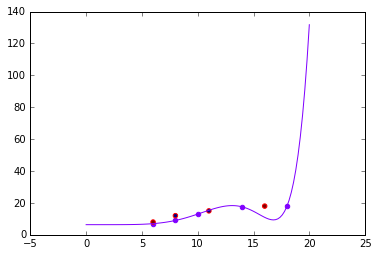

In [190]:
xx = np.linspace(0, 20, 100).reshape(100, 1)
xx_quad = quadratic_featurizer.fit_transform(xx)
make_2d_plot([X_train, y_train, X_test, y_test], [xx, model.predict(xx_quad)])

In [ ]:
model = LinearRegression(pena)